# Chapter 5. Model evaluation and enhancement.
# Part 3. Quality metrics.
R^2 for regressions and accuracy for classificators sometimes are not the metrics that really needed. Thus there are more.

2 types of errors:

1) False-positive

2) False-negative

Accuracy is NOT an adequate metric for evaluating model prognostic ability fitted over unbalanced datasets.

## - Confusion Matrices
One of the most qualitative methods to evaluate model's prognostic ability

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#-----setting up
#--loading dataset
digits = load_digits()
#'== 9' means that dataset will have only one forecasting class
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

#initialization, builidng and applying logreg
logreg = LogisticRegression(C=0.2).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

#-----applying confusion matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix: \n{}'.format(confusion))

Confusion matrix: 
[[402   1]
 [  6  41]]


/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


^ Gain array means following:

Number of rows (2): There were 2 actual classes and each row represents one of them

Number of columns (2): Forecated 2 classes and each column represents one of them

Main diagonal represents number of correctly forecasted samples

Rest of elements represents numbers of mistakes

#### Some examples for alternative models:
These models show nice accuracy but considering the unbalanced dataset they were trained on AND the very incorrect specifics of some of them, there IS a need of using another metrics like confusion matrix to check the actual prognostic ability.

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

#-----setting up models
#strategy - most frequent class preferring
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

#strategy - tree model
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

#strategy - dummies model
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

#model's quality check
print("<Most frequent> strategy:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n<Dummy model> strategy:")
print(confusion_matrix(y_test, pred_dummy))
print("\n<Tree model> strategy:")
print(confusion_matrix(y_test, pred_tree))

<Most frequent> strategy:
[[403   0]
 [ 47   0]]

<Dummy model> strategy:
[[403   0]
 [ 47   0]]

<Tree model> strategy:
[[390  13]
 [ 24  23]]


^ Only tree model among given alternatives shows a decent ish correctness. But still logreg was better.

## - Precision, recall, F-measure
Precision, recall and F-measure are another metrics (apart from correctness) to evaluate specifics of prognostication ability.

Precision. It's high if all Prognosed Positive samples are True.

Precision = TP / (TP + FP)

Recall. It's high if all Actual Positive samples are covered.

Recall = TP / (TP + FN)

F-measure. It's high if there's a compromise between Precision and Recall.

F-measure = 2(Precision*Recall) / (Precision+Recall)

In [4]:
from sklearn.metrics import f1_score
print('MosFreq F-measure: {}'.format(f1_score(y_test, pred_most_frequent)))
print('Dummy F-measure: {}'.format(f1_score(y_test, pred_dummy)))
print('Tree F-measure: {}'.format(f1_score(y_test, pred_tree)))
print('Logreg F-measure: {}'.format(f1_score(y_test, pred_logreg)))


MosFreq F-measure: 0.0
Dummy F-measure: 0.0
Tree F-measure: 0.5542168674698795
Logreg F-measure: 0.9213483146067415


^ It's clear that LogReg only has a decent prognostication ability.

There's another tool to get reports with pronostication ability analysis:

In [5]:
from sklearn.metrics import classification_report

print('- MostFreq report:')
print(classification_report(y_test, pred_most_frequent, target_names=['not-a-nine','a-nine']))
print()
print('- Dummy report:')
print(classification_report(y_test, pred_dummy, target_names=['not-a-nine','a-nine']))
print()
print('- LogReg report:')
print(classification_report(y_test, pred_logreg, target_names=['not-a-nine','a-nine']))

- MostFreq report:
              precision    recall  f1-score   support

  not-a-nine       0.90      1.00      0.94       403
      a-nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


- Dummy report:
              precision    recall  f1-score   support

  not-a-nine       0.90      1.00      0.94       403
      a-nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


- LogReg report:
              precision    recall  f1-score   support

  not-a-nine       0.99      1.00      0.99       403
      a-nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0

/home/akado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akado/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akado/.local/lib/python3.8/site-packa

^ Again, it's clear that LogReg only has a decent prognostication ability since this model is the only one with high F-measure for both classes.

## - Uncertainty accounting.
Instead of refitting model each time there's a need to shift decision border, it's more convenient to adjust threshold for uncertainty values of vanilla 'y's to get adjusted 'y's.

Vanilla model:

In [6]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

#setup
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

#prognostication ability report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


^ For '1' class precision is bad and recall is mediocre. The task here would be increasing recall metric.

Adjusting threshold for uncertainty values:

In [7]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

#prognostication ability report
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



^ Recall metric became perfect.

## - Precision-recall curve
It's usefull to check all possible precision-recall combinations to find optimal needed threshold.

It's done by 'precision_recall_curve':

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


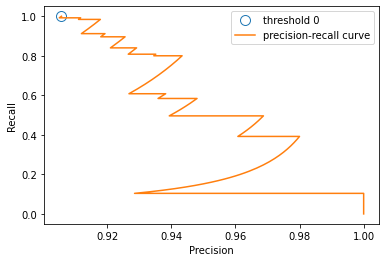

In [15]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

#-----setup
#model setup:
X, y = make_blobs(n_samples=(400,500), centers=2,cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

#function returns arrays for each combination:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

#finding the closest to zero threshold:
close_zero = np.argmin(np.abs(thresholds))

#-----rendering
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold 0', fillstyle='none')
plt.plot(precision, recall, label='precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

^ The closer threshold to high-right corner is then better the model is.

Comparison of Precision-recall curves for different models:

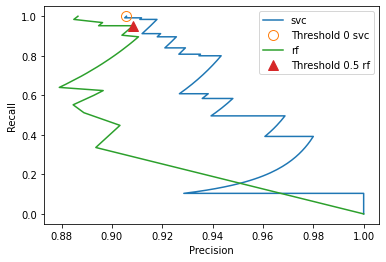

In [18]:
from sklearn.ensemble import RandomForestClassifier

#-----setup
#rf model setup
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(X_train,y_train)

#applying function (function expects probabilities for positive class):
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

#finding the closest to zero threshold:
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

#-----rendering
#rendering svc model:
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='Threshold 0 svc', fillstyle='none')
#rendering rf model:
plt.plot(precision_rf, recall_rf, label='rf')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label='Threshold 0.5 rf')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

^ According to book there were expected a bit different results but still svc gives better results.

To generalize all the information provided by precision-recall curves it's good to use 'average_precision_score' (integrates the curve to calculate area which is used to measure the quality):

In [19]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision rf: {}'.format(ap_rf))
print('Average precision svc: {}'.format(ap_svc))

Average precision rf: 0.8954301607352231
Average precision svc: 0.9518256666784293


^ svc indeed gives a better general quality.

Such a general conclusion wouldn't be clear enough by using only the f-meausre (because it's relevant for threshold point only):

In [20]:
print('F-measure rf: {}'.format(f1_score(y_test, rf.predict(X_test))))
print('F-measure svc: {}'.format(f1_score(y_test, svc.predict(X_test))))

F-measure rf: 0.9296875
F-measure svc: 0.9433962264150945
